In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

wine=load_wine()
df = pd.DataFrame(wine['data'],columns=wine['feature_names'])
label=wine["target"]

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import metrics

X_train,X_test,y_train,y_test=train_test_split(df,label,test_size=0.3,random_state=50)
model=LogisticRegression()
model.fit(X_train,y_train)
predicted=model.predict(X_test)
score=metrics.accuracy_score(y_test,predicted)
print(score)

NameError: ignored

In [ ]:
def initialize(n_feat,sz):
    population=[]
    for i in range(sz):
        chromosome=np.ones(n_feat,dtype=int)
        chromosome[:int(0.3*n_feat)]=0
        np.random.shuffle(chromosome)
        population.append(chromosome)
    initial_pop=np.array(population)
    return initial_pop

In [ ]:
def rastrigin_fitness_fun(population,n_feat):
    A=10
    scores=[]
    i=0
    #print("rastrigin func pop: ", population,"\n")
    for chromosome in range(len(population)):
        score=np.sum(population[chromosome]**2-A*np.cos(2*np.pi*population[chromosome]))
        score+=A*n_feat
        scores.append(score)
    return scores,population

In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    selected_indiviuals=np.array(selected_indiviuals_list)
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals



In [ ]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [ ]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(sz):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    chromosome_pop=np.array(mutated_pop)
    #print("chromo mutated pop: ", len(chromosome_pop))
    return chromosome_pop


In [ ]:
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    for i in range(n_gens):
        #print("generation no.: ", i)
        scores,best_fit=rastrigin_fitness_fun(chromosomes_pop,n_feat)
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        #print("!===========!",stats_avg)
        #print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        #print("population size after selection", len(pop_selc), "\n")
        pop_cross_res=crossover(pop_selc,n_feat)
        #print("population size after cross over", len(pop_cross_res), "\n")
        if pop_cross_res == 0 :
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if chromosomes_pop.size == 0 :
          break
        #print("population size after mutation", len(pop_cross_res), "\n")
        #print("\n ==================================")
    return stats_min,stats_max,stats_avg

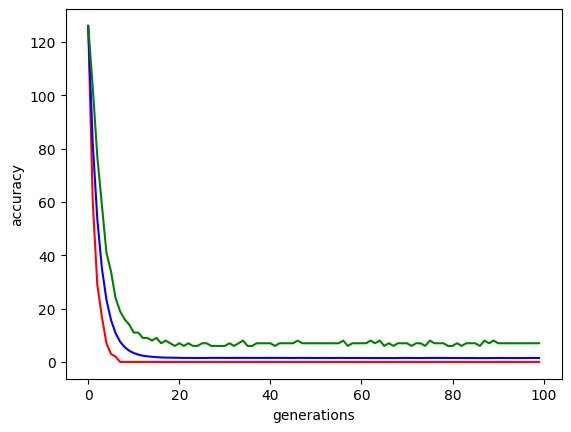

ValueError: ignored

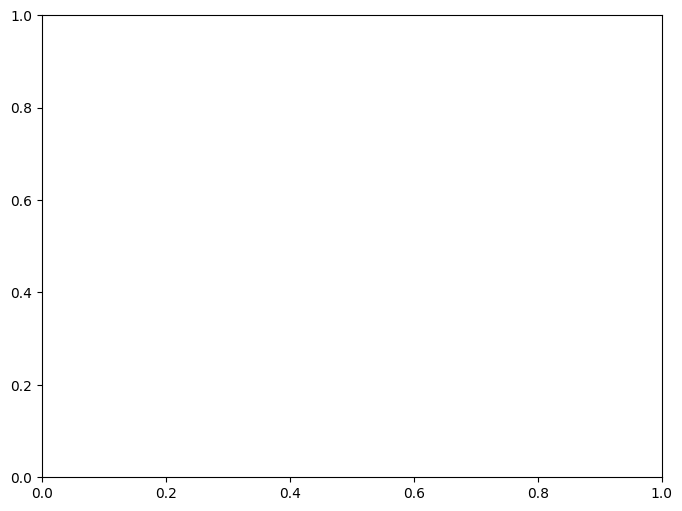

In [ ]:
if __name__ == "__main__":
    stats_min,stats_max,stats_avg=generations(10000,180,0.7,100)
    # plot the statistics
    plt.plot(stats_min,'r')
    plt.plot(stats_avg,'b')
    plt.plot(stats_max,'g')
    plt.ylabel('accuracy')
    plt.xlabel('generations')
    plt.show()
    plt.figure(figsize=(8, 6))
    plt.plot(range(200), stats_max*100)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.grid(True)
    plt.show()

# Sphere function

In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
def initialize(n_feat,sz):
    population=[]
    for i in range(sz):
        chromosome=np.ones(n_feat,dtype=bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    initial_pop=np.array(population)
    return initial_pop

In [ ]:
def sphere_fitness_fun(population,n_feat):
    scores=[]
    #print("rastrigin func pop: ", population,"\n")
    for chromosome in range(len(population)-1):
        score=np.sum(100*(population[chromosome+1]-population[chromosome]**2)**2 + (1-population[chromosome]**2))
        scores.append(score)
    return scores,population

In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i in range(len(best_fit)-1):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    selected_indiviuals=np.array(selected_indiviuals_list)
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals



In [ ]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.8 or random.random()==0.8 ):
            mask[k]=1
    return mask


In [ ]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(sz):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
               # mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]=not chromosome[j]
        mutated_pop.append(chromosome.copy())
    chromosome_pop=np.array(mutated_pop)
    #print("chromo mutated pop: ", len(chromosome_pop))
    return chromosome_pop


In [ ]:
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    for i in range(n_gens):
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        if len(scores) == 0:
          break
        stats_min[i]=(np.min(scores)/np.sum(scores))*100
        #print("!===========!",stats_min)
        stats_max[i]=(np.amax(scores)/np.sum(scores))*100
        #print("!===========!",stats_max)
        stats_avg[i]=(np.mean(scores))
        #print("!===========!",stats_avg)
        #print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        #print("population size after selection", len(pop_selc), "\n")
        pop_cross_res=crossover(pop_selc,n_feat)
        #print("population size after cross over", len(pop_cross_res), "\n")
        if pop_cross_res == 0 :
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if chromosomes_pop.size == 0 :
          break
        #print("population size after mutation", len(pop_cross_res), "\n")
        #print("\n ==================================")
    return stats_min,stats_max,stats_avg

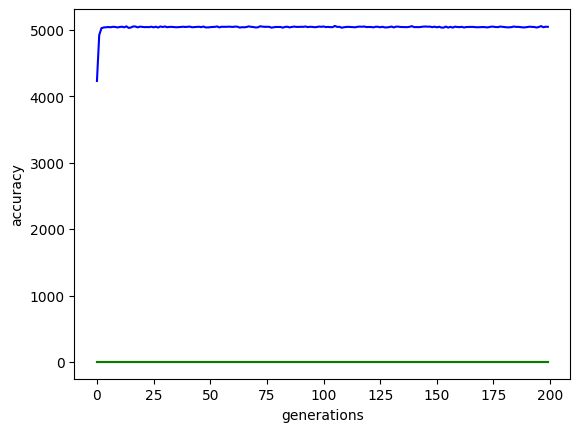

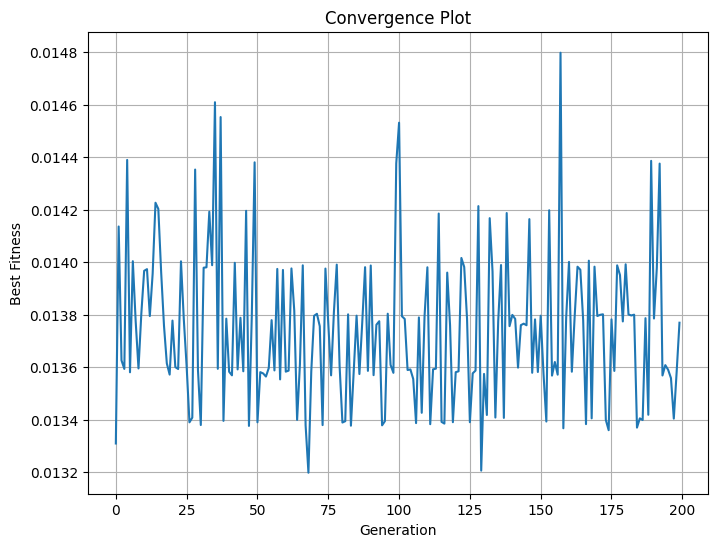

In [ ]:
if __name__ == "__main__":
    stats_min,stats_max,stats_avg=generations(10000,100,0.7,200)
    # plot the statistics
    plt.plot(stats_min,'r')
    plt.plot(stats_avg,'b')
    plt.plot(stats_max,'g')
    plt.ylabel('accuracy')
    plt.xlabel('generations')
    plt.show()
    plt.figure(figsize=(8, 6))
    plt.plot(range(200), stats_max)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.grid(True)
    plt.show()